In [1]:
import pandas as pd
import numpy as np

In [2]:
cleaned_features = pd.read_csv("cleaned_imputed_features.csv", encoding='utf-8')

In [3]:
target = cleaned_features.GENTRIFIED.values #instantiate target array before dropping GENTRIFIED

In [4]:
cleaned_features.drop('GENTRIFIED', axis=1, inplace=True)

In [7]:
cleaned_features.values[0]

array([ 27,  13,   7,  13,  14,  15,   6,  20,  29,  22,  58,  28,  37,
        33,  34,  27,  18,   6,   6,  14,   8,   0,  38,  40,  59,   0,
        10,  27,   0,   0,  16,  11,   0,   0,   0,   3,  29,  18,  10,
         0,   0,   3,   0,   7,  13,   0,  24,  25,   0,   0,   0,   0,
         0,  21,  16,  66,   0,   0,   0,   0,   0,   0,  14,   0,   0,
         0,   0,   0,   0,   0,  13,   0,  14,  31,   0,   0,   0,   6,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20,   0,
         0,  54,   0,   0,   0, 100,   0,  45,  29,  38,   0,  15,  23,
        14,   0,   0,  33,  35,  22,   5,  23,  23,  17,  53,   0,  30,
        33,  76,  28,  11,  28,   0,  18,  11,   0,   0,   0,   2,   9,
        23,   9,   5,   0,   3,   4,  13,   5,   0,  39,  58,   0,   0,
         0,   0,   0,  19,  32,   0,  32,  21,  76,  15,   0,   0,   8,
         0,   0,   0,   0,   0,   0,  31,   0,   0,   0,   0,   0,   0,
         0,  22,   0,   0,   0,   0,   0,   0,   0,   0,  14,   

In [6]:
cleaned_features = cleaned_features.replace(-9223372036854775808, 0)

In [62]:
# cleaned_features.to_csv('all_features_sans_9223372036854775808.txt', encoding='utf-8', header=False, index=False) #for regression

In [8]:
list(cleaned_features.columns)[3]

'ACS_09_B08303_HD01_VD04_Estimate__10_to_14_minutes_100scale'

In [10]:
marital_ed_SNAP = cleaned_features[[ 'ACS_09_B12002_HD01_VD03_Estimate__Male__Never_married_100scale',
 'ACS_09_B12002_HD01_VD04_Estimate__Male__Never_married__15_to_17_years_100scale',
 'ACS_09_B12002_HD01_VD05_Estimate__Male__Never_married__18_and_19_years_100scale',
 'ACS_09_B12002_HD01_VD06_Estimate__Male__Never_married__20_to_24_years_100scale',
 'ACS_09_B12002_HD01_VD07_Estimate__Male__Never_married__25_to_29_years_100scale',
 'ACS_09_B12002_HD01_VD08_Estimate__Male__Never_married__30_to_34_years_100scale',
 'ACS_09_B12002_HD01_VD09_Estimate__Male__Never_married__35_to_39_years_100scale',
 'ACS_09_B12002_HD01_VD19_Estimate__Male__Now_married__Married,_spouse_present_100scale',
 'ACS_09_B12002_HD01_VD20_Estimate__Male__Now_married__Married,_spouse_present__15_to_17_years_100scale',
 'ACS_09_B12002_HD01_VD21_Estimate__Male__Now_married__Married,_spouse_present__18_and_19_years_100scale',
 'ACS_09_B12002_HD01_VD22_Estimate__Male__Now_married__Married,_spouse_present__20_to_24_years_100scale',
 'ACS_09_B12002_HD01_VD23_Estimate__Male__Now_married__Married,_spouse_present__25_to_29_years_100scale',
 'ACS_09_B12002_HD01_VD24_Estimate__Male__Now_married__Married,_spouse_present__30_to_34_years_100scale',
 'ACS_09_B12002_HD01_VD25_Estimate__Male__Now_married__Married,_spouse_present__35_to_39_years_100scale',
'ACS_09_B12002_HD01_VD127_Estimate__Female__Now_married__Married,_spouse_absent_100scale',
 'ACS_09_B12002_HD01_VD128_Estimate__Female__Now_married__Married,_spouse_absent__Separated_100scale',
 'ACS_09_B12002_HD01_VD129_Estimate__Female__Now_married__Married,_spouse_absent__Separated__15_to_17_years_100scale',
 'ACS_09_B12002_HD01_VD130_Estimate__Female__Now_married__Married,_spouse_absent__Separated__18_and_19_years_100scale',
 'ACS_09_B12002_HD01_VD131_Estimate__Female__Now_married__Married,_spouse_absent__Separated__20_to_24_years_100scale',
 'ACS_09_B12002_HD01_VD132_Estimate__Female__Now_married__Married,_spouse_absent__Separated__25_to_29_years_100scale',
 'ACS_09_B12002_HD01_VD133_Estimate__Female__Now_married__Married,_spouse_absent__Separated__30_to_34_years_100scale',
 'ACS_09_B12002_HD01_VD134_Estimate__Female__Now_married__Married,_spouse_absent__Separated__35_to_39_years_100scale',
'ACS_09_B19054_HD01_VD02_Estimate__With_interest,_dividends,_or_net_rental_income_100scale',
 'ACS_09_B19054_HD01_VD03_Estimate__No_interest,_dividends,_or_net_rental_income_100scale',
 'ACS_09_B19055_HD01_VD01_Estimate__Total_100scale',
 'ACS_09_B19055_HD01_VD02_Estimate__With_Social_Security_income_100scale',
 'ACS_09_B19055_HD01_VD03_Estimate__No_Social_Security_income_100scale',
 'ACS_09_B25003_HD01_VD01_Estimate__Total_100scale',
 'ACS_09_B25003_HD01_VD02_Estimate__Owner_occupied_100scale',
 'ACS_09_B25003_HD01_VD03_Estimate__Renter_occupied_100scale',
'ACS_09_S1301_HC03_EST_VC01_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years_100scale','ACS_09_S1301_HC04_EST_VC01_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years_100scale',
 'ACS_09_S1301_HC05_EST_VC01_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years_100scale',
 'ACS_09_S1301_HC01_EST_VC02_Total__Estimate__Women_15_to_50_years__15_to_19_years_100scale',
 'ACS_09_S1301_HC03_EST_VC02_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__15_to_19_years_100scale',
 'ACS_09_S1301_HC04_EST_VC02_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__15_to_19_years_100scale',
 'ACS_09_S1301_HC05_EST_VC02_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__15_to_19_years_100scale',
 'ACS_09_S1301_HC01_EST_VC03_Total__Estimate__Women_15_to_50_years__20_to_34_years_100scale',
 'ACS_09_S1301_HC03_EST_VC03_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__20_to_34_years_100scale',
 'ACS_09_S1301_HC04_EST_VC03_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__20_to_34_years_100scale',
 'ACS_09_S1301_HC05_EST_VC03_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__20_to_34_years_100scale',
 'ACS_09_S1301_HC01_EST_VC04_Total__Estimate__Women_15_to_50_years__35_to_50_years_100scale',
 'ACS_09_S1301_HC03_EST_VC04_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__35_to_50_years_100scale',
 'ACS_09_S1301_HC04_EST_VC04_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__35_to_50_years_100scale',
 'ACS_09_S1301_HC05_EST_VC04_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__35_to_50_years_100scale',
 'ACS_09_S1301_HC01_EST_VC06_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race_100scale',
 'ACS_09_S1301_HC03_EST_VC06_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race_100scale',
 'ACS_09_S1301_HC04_EST_VC06_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race_100scale',
 'ACS_09_S1301_HC05_EST_VC06_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race_100scale',
 'ACS_09_S1301_HC01_EST_VC07_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__White_100scale',
 'ACS_09_S1301_HC03_EST_VC07_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__White_100scale',
 'ACS_09_S1301_HC04_EST_VC07_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__White_100scale',
 'ACS_09_S1301_HC05_EST_VC07_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__White_100scale',
 'ACS_09_S1301_HC01_EST_VC08_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Black_or_African_American_100scale',
 'ACS_09_S1301_HC03_EST_VC08_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Black_or_African_American_100scale',
 'ACS_09_S1301_HC04_EST_VC08_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Black_or_African_American_100scale',
 'ACS_09_S1301_HC05_EST_VC08_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Black_or_African_American_100scale',
 'ACS_09_S1301_HC01_EST_VC09_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__American_Indian_and_Alaska_Native_100scale',
 'ACS_09_S1301_HC03_EST_VC09_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__American_Indian_and_Alaska_Native_100scale',
 'ACS_09_S1301_HC04_EST_VC09_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__American_Indian_and_Alaska_Native_100scale',
 'ACS_09_S1301_HC05_EST_VC09_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__American_Indian_and_Alaska_Native_100scale',
 'ACS_09_S1301_HC01_EST_VC10_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Asian_100scale',
 'ACS_09_S1301_HC03_EST_VC10_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Asian_100scale',
 'ACS_09_S1301_HC04_EST_VC10_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Asian_100scale',
 'ACS_09_S1301_HC05_EST_VC10_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Asian_100scale',
 'ACS_09_S1301_HC01_EST_VC11_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
 'ACS_09_S1301_HC03_EST_VC11_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
 'ACS_09_S1301_HC04_EST_VC11_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
 'ACS_09_S1301_HC05_EST_VC11_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
 'ACS_09_S1301_HC01_EST_VC12_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Some_other_race_100scale',
 'ACS_09_S1301_HC03_EST_VC12_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Some_other_race_100scale',
 'ACS_09_S1301_HC04_EST_VC12_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Some_other_race_100scale',
 'ACS_09_S1301_HC05_EST_VC12_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__One_race__Some_other_race_100scale',
 'ACS_09_S1301_HC01_EST_VC13_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__Two_or_more_races_100scale',
 'ACS_09_S1301_HC03_EST_VC13_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__Two_or_more_races_100scale',
 'ACS_09_S1301_HC04_EST_VC13_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__Two_or_more_races_100scale',
 'ACS_09_S1301_HC05_EST_VC13_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__Two_or_more_races_100scale',
 'ACS_09_S1301_HC01_EST_VC14_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__Hispanic_or_Latino_origin_(of_any_race_100scale',
 'ACS_09_S1301_HC03_EST_VC14_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__Hispanic_or_Latino_origin_(of_any_race_100scale',
 'ACS_09_S1301_HC04_EST_VC14_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__Hispanic_or_Latino_origin_(of_any_race_100scale',
 'ACS_09_S1301_HC05_EST_VC14_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__Hispanic_or_Latino_origin_(of_any_race_100scale',
 'ACS_09_S1301_HC01_EST_VC15_Total__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__White_alone,_not_Hispanic_or_Latino_100scale',
 'ACS_09_S1301_HC03_EST_VC15_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__White_alone,_not_Hispanic_or_Latino_100scale',
 'ACS_09_S1301_HC04_EST_VC15_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__White_alone,_not_Hispanic_or_Latino_100scale',
 'ACS_09_S1301_HC05_EST_VC15_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__RACE_AND_HISPANIC_OR_LATINO_ORIGIN__White_alone,_not_Hispanic_or_Latino_100scale',
 'ACS_09_S1301_HC01_EST_VC17_Total__Estimate__Women_15_to_50_years__CITIZENSHIP_STATUS__Native_100scale',
 'ACS_09_S1301_HC03_EST_VC17_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__CITIZENSHIP_STATUS__Native_100scale',
 'ACS_09_S1301_HC04_EST_VC17_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__CITIZENSHIP_STATUS__Native_100scale',
 'ACS_09_S1301_HC05_EST_VC17_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__CITIZENSHIP_STATUS__Native_100scale',
 'ACS_09_S1301_HC01_EST_VC18_Total__Estimate__Women_15_to_50_years__CITIZENSHIP_STATUS__Foreign_born_100scale',
 'ACS_09_S1301_HC03_EST_VC18_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__CITIZENSHIP_STATUS__Foreign_born_100scale',
 'ACS_09_S1301_HC04_EST_VC18_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__CITIZENSHIP_STATUS__Foreign_born_100scale',
 'ACS_09_S1301_HC05_EST_VC18_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__CITIZENSHIP_STATUS__Foreign_born_100scale',
 'ACS_09_S1301_HC01_EST_VC20_Total__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Less_than_high_school_graduate_100scale',
 'ACS_09_S1301_HC03_EST_VC20_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Less_than_high_school_graduate_100scale',
 'ACS_09_S1301_HC04_EST_VC20_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Less_than_high_school_graduate_100scale',
 'ACS_09_S1301_HC05_EST_VC20_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Less_than_high_school_graduate_100scale',
 'ACS_09_S1301_HC01_EST_VC21_Total__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__High_school_graduate_(includes_equivalency_100scale',
 'ACS_09_S1301_HC03_EST_VC21_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__High_school_graduate_(includes_equivalency_100scale',
 'ACS_09_S1301_HC04_EST_VC21_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__High_school_graduate_(includes_equivalency_100scale',
 'ACS_09_S1301_HC05_EST_VC21_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__High_school_graduate_(includes_equivalency_100scale',
 "ACS_09_S1301_HC01_EST_VC22_Total__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Some_college_or_associate's_degree_100scale",
 "ACS_09_S1301_HC03_EST_VC22_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Some_college_or_associate's_degree_100scale",
 "ACS_09_S1301_HC04_EST_VC22_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Some_college_or_associate's_degree_100scale",
 "ACS_09_S1301_HC05_EST_VC22_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Some_college_or_associate's_degree_100scale",
 "ACS_09_S1301_HC01_EST_VC23_Total__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Bachelor's_degree_100scale",
 "ACS_09_S1301_HC03_EST_VC23_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Bachelor's_degree_100scale",
 "ACS_09_S1301_HC04_EST_VC23_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Bachelor's_degree_100scale",
 "ACS_09_S1301_HC05_EST_VC23_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Bachelor's_degree_100scale",
 'ACS_09_S1301_HC01_EST_VC24_Total__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Graduate_or_professional_degree_100scale',
 'ACS_09_S1301_HC03_EST_VC24_Women_with_births_in_the_past_12_months__Number__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Graduate_or_professional_degree_100scale',
 'ACS_09_S1301_HC04_EST_VC24_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Graduate_or_professional_degree_100scale',
 'ACS_09_S1301_HC05_EST_VC24_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__Women_15_to_50_years__EDUCATIONAL_ATTAINMENT__Graduate_or_professional_degree_100scale',
 'ACS_09_S1301_HC01_EST_VC26_Total__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined_100scale',
 'ACS_09_S1301_HC03_EST_VC26_Women_with_births_in_the_past_12_months__Number__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined_100scale',
 'ACS_09_S1301_HC04_EST_VC26_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined_100scale',
 'ACS_09_S1301_HC05_EST_VC26_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined_100scale',
 'ACS_09_S1301_HC01_EST_VC27_Total__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__Below_100_percent_of_poverty_level_100scale',
 'ACS_09_S1301_HC03_EST_VC27_Women_with_births_in_the_past_12_months__Number__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__Below_100_percent_of_poverty_level_100scale',
 'ACS_09_S1301_HC04_EST_VC27_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__Below_100_percent_of_poverty_level_100scale',
 'ACS_09_S1301_HC05_EST_VC27_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__Below_100_percent_of_poverty_level_100scale',
 'ACS_09_S1301_HC01_EST_VC28_Total__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__100_to_199_percent_of_poverty_level_100scale',
 'ACS_09_S1301_HC03_EST_VC28_Women_with_births_in_the_past_12_months__Number__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__100_to_199_percent_of_poverty_level_100scale',
 'ACS_09_S1301_HC04_EST_VC28_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__100_to_199_percent_of_poverty_level_100scale',
 'ACS_09_S1301_HC05_EST_VC28_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__100_to_199_percent_of_poverty_level_100scale',
 'ACS_09_S1301_HC01_EST_VC29_Total__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__200_percent_or_more_above_poverty_level_100scale',
 'ACS_09_S1301_HC03_EST_VC29_Women_with_births_in_the_past_12_months__Number__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__200_percent_or_more_above_poverty_level_100scale',
 'ACS_09_S1301_HC04_EST_VC29_Women_with_births_in_the_past_12_months__Rate_per_1,000_women__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__200_percent_or_more_above_poverty_level_100scale',
 'ACS_09_S1301_HC05_EST_VC29_Percent__of_women_who_had_a_birth_in_the_past_12_months_who_were_unmarried__Estimate__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Women_15_to_50_years_for_whom_poverty_status_is_determined__200_percent_or_more_above_poverty_level_100scale',
'ACS_09_S2201_HC02_EST_VC01_Households_receiving_food_stamps__Estimate__Households_100scale',
 'ACS_09_S2201_HC03_EST_VC01_Households_not_receiving_food_stamps__Estimate__Households_100scale',
 'ACS_09_S2201_HC01_EST_VC02_Total__Estimate__Households__With_one_or_more_people_60_years_and_over_100scale',
 'ACS_09_S2201_HC02_EST_VC02_Households_receiving_food_stamps__Estimate__Households__With_one_or_more_people_60_years_and_over_100scale',
 'ACS_09_S2201_HC03_EST_VC02_Households_not_receiving_food_stamps__Estimate__Households__With_one_or_more_people_60_years_and_over_100scale',
 'ACS_09_S2201_HC01_EST_VC03_Total__Estimate__Households__With_children_under_18_years_100scale',
 'ACS_09_S2201_HC02_EST_VC03_Households_receiving_food_stamps__Estimate__Households__With_children_under_18_years_100scale',
 'ACS_09_S2201_HC03_EST_VC03_Households_not_receiving_food_stamps__Estimate__Households__With_children_under_18_years_100scale',
 'ACS_09_S2201_HC01_EST_VC05_Total__Estimate__Households__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Below_poverty_level_100scale',
 'ACS_09_S2201_HC02_EST_VC05_Households_receiving_food_stamps__Estimate__Households__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Below_poverty_level_100scale',
 'ACS_09_S2201_HC03_EST_VC05_Households_not_receiving_food_stamps__Estimate__Households__POVERTY_STATUS_IN_THE_PAST_12_MONTHS__Below_poverty_level_100scale',
 'ACS_09_S2201_HC01_EST_VC09_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race_100scale',
 'ACS_09_S2201_HC02_EST_VC09_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race_100scale',
 'ACS_09_S2201_HC03_EST_VC09_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race_100scale',
 'ACS_09_S2201_HC01_EST_VC10_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__White_100scale',
 'ACS_09_S2201_HC02_EST_VC10_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__White_100scale',
 'ACS_09_S2201_HC03_EST_VC10_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__White_100scale',
 'ACS_09_S2201_HC01_EST_VC11_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Black_or_African_American_100scale',
 'ACS_09_S2201_HC02_EST_VC11_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Black_or_African_American_100scale',
 'ACS_09_S2201_HC03_EST_VC11_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Black_or_African_American_100scale',
 'ACS_09_S2201_HC01_EST_VC12_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__American_Indian_and_Alaska_Native_100scale',
 'ACS_09_S2201_HC02_EST_VC12_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__American_Indian_and_Alaska_Native_100scale',
 'ACS_09_S2201_HC03_EST_VC12_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__American_Indian_and_Alaska_Native_100scale',
 'ACS_09_S2201_HC01_EST_VC13_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Asian_100scale',
 'ACS_09_S2201_HC02_EST_VC13_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Asian_100scale',
 'ACS_09_S2201_HC03_EST_VC13_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Asian_100scale',
 'ACS_09_S2201_HC01_EST_VC14_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
 'ACS_09_S2201_HC02_EST_VC14_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
 'ACS_09_S2201_HC03_EST_VC14_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Native_Hawaiian_and_Other_Pacific_Islander_100scale',
 'ACS_09_S2201_HC01_EST_VC15_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Some_other_race_100scale',
 'ACS_09_S2201_HC02_EST_VC15_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Some_other_race_100scale',
 'ACS_09_S2201_HC03_EST_VC15_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__One_race__Some_other_race_100scale',
 'ACS_09_S2201_HC01_EST_VC16_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__Two_or_more_races_100scale',
 'ACS_09_S2201_HC02_EST_VC16_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__Two_or_more_races_100scale',
 'ACS_09_S2201_HC03_EST_VC16_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__Two_or_more_races_100scale',
 'ACS_09_S2201_HC01_EST_VC17_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__Hispanic_or_Latino_origin_(of_any_race_100scale',
 'ACS_09_S2201_HC02_EST_VC17_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__Hispanic_or_Latino_origin_(of_any_race_100scale',
 'ACS_09_S2201_HC03_EST_VC17_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__Hispanic_or_Latino_origin_(of_any_race_100scale',
 'ACS_09_S2201_HC01_EST_VC18_Total__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__White_alone,_not_Hispanic_or_Latino_100scale',
 'ACS_09_S2201_HC02_EST_VC18_Households_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__White_alone,_not_Hispanic_or_Latino_100scale',
 'ACS_09_S2201_HC03_EST_VC18_Households_not_receiving_food_stamps__Estimate__Households__RACE_AND_HISPANIC_OR_LATINO_ORIGIN_OF_HOUSEHOLDER__White_alone,_not_Hispanic_or_Latino_100scale',
 'ACS_09_S2201_HC01_EST_VC20_Total__Estimate__Households__HOUSEHOLD_INCOME_IN_THE_PAST_12_MONTHS_(IN_2009_INFLATIONADJUSTED_DOLLARS__Median_income_(dollars_100scale',
 'ACS_09_S2201_HC02_EST_VC20_Households_receiving_food_stamps__Estimate__Households__HOUSEHOLD_INCOME_IN_THE_PAST_12_MONTHS_(IN_2009_INFLATIONADJUSTED_DOLLARS__Median_income_(dollars_100scale',
 'ACS_09_S2201_HC03_EST_VC20_Households_not_receiving_food_stamps__Estimate__Households__HOUSEHOLD_INCOME_IN_THE_PAST_12_MONTHS_(IN_2009_INFLATIONADJUSTED_DOLLARS__Median_income_(dollars_100scale',
 'ACS_09_S2201_HC01_EST_VC22_Total__Estimate__WORK_STATUS__Families_100scale',
 'ACS_09_S2201_HC02_EST_VC22_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families_100scale',
 'ACS_09_S2201_HC03_EST_VC22_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families_100scale',
 'ACS_09_S2201_HC01_EST_VC23_Total__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
 'ACS_09_S2201_HC02_EST_VC23_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
 'ACS_09_S2201_HC03_EST_VC23_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
 'ACS_09_S2201_HC01_EST_VC24_Total__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale',
 'ACS_09_S2201_HC02_EST_VC24_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale',
 'ACS_09_S2201_HC03_EST_VC24_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale',
 'ACS_09_S2201_HC01_EST_VC25_Total__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale',
 'ACS_09_S2201_HC02_EST_VC25_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale',
 'ACS_09_S2201_HC03_EST_VC25_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale',
 'ACS_09_S2201_HC01_EST_VC27_Total__Estimate__PERCENT_IMPUTED__Food_stamp/SNAP_recipiency_100scale']]

In [11]:
features_array  = marital_ed_SNAP.values

In [21]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.25, random_state=0)

In [31]:
%%time

from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators=100)
# rf.fit(features_train, target_train)
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
min_samples_split=1, random_state=0)
clf.fit(features_train,target_train)
scores = cross_val_score(clf, features_train, target_train)
scores.mean()      
# scores = cross_val_score(features_array, target, cv=5, n_jobs=4,
#                          scoring='accuracy')
print("Random Forest CV scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))

Random Forest CV scores:
min: 0.902, mean: 0.904, max: 0.908
Wall time: 754 ms


In [32]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                subsample=.8, max_features=.5)
scores = cross_val_score(gb, features_train, target_train, cv=5, n_jobs=4,
                         scoring='accuracy')
print("Gradient Boosted Trees CV scores:")
print("min: {:.3f}, mean: {:.3f}, max: {:.3f}".format(
    scores.min(), scores.mean(), scores.max()))


#Note Classification with more than 2 classes requires the induction of n_classes regression trees at each at
#each iteration, thus, the total number of induced trees equals n_classes * n_estimators. For datasets with 
#a large number of classes I strongly recommend to use RandomForestClassifier as an alternative to GradientBoostingClassifier .

Gradient Boosted Trees CV scores:
min: 0.857, mean: 0.884, max: 0.902
Wall time: 2.25 s


In [33]:
target_predicted = clf.predict(features_test)

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.86928104575163401

In [35]:
clf.score(features_test, target_test)

0.86928104575163401

In [37]:
from sklearn.metrics import classification_report

#wow! 100% recall....

print(classification_report(target_test, target_predicted,
                            target_names=['gentrified', 'not gentrified']))

                precision    recall  f1-score   support

    gentrified       0.87      1.00      0.93       133
not gentrified       0.00      0.00      0.00        20

   avg / total       0.76      0.87      0.81       153



C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\metrics\classification.py:958: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
target_predicted_prob = clf.predict_proba(features_test)

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

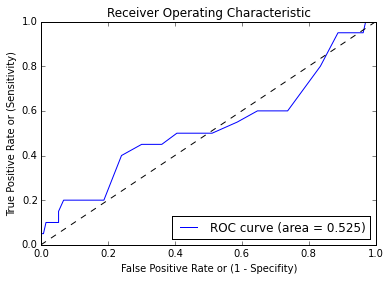

In [42]:
plot_roc_curve(target_test,target_predicted_prob)

In [43]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf, features_array, target, cv=5)

In [44]:
scores.min(), scores.max(), scores.mean()

(0.87804878048780488, 0.90082644628099173, 0.89218714717969561)

In [45]:
scores = cross_val_score(clf, features_array, target, cv=3,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.48809523809523803, 0.52535306223830813, 0.59811227024341762)

In [46]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.tree import DecisionTreeClassifier

In [47]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
random_state=0)
scores = cross_val_score(clf, features_train, target_train)
scores.mean()                             

0.81691658587943417

In [103]:
# clf = RandomForestClassifier(n_estimators=10, max_depth=None,
# min_samples_split=1, random_state=0) --->0.90415097458441107
# clf = RandomForestClassifier(n_estimators=10, max_depth=None,
# min_samples_split=1, oob_score = True, random_state = 42) ---> 0.89760050750762821

scores = cross_val_score(clf, features_train, target_train)
scores.mean()                             

0.89760050750762821

In [56]:
extra_forest = ExtraTreesClassifier(n_estimators=10, max_depth=None,
min_samples_split=1, random_state=0)
scores = cross_val_score(extra_forest, features_train, target_train)
scores.mean()

0.89979348996376851

In [17]:
n_estimators = 100
forest = RandomForestClassifier(warm_start=True, oob_score=True)

for i in range(1, n_estimators + 1):
    forest.set_params(n_estimators=i)
    forest.fit(features_train, target_train)
    print(i, forest.oob_score_)

C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees

1 0.867075664622
2 0.856850715746
3 0.856850715746
4 0.846625766871
5 0.840490797546
6 0.844580777096
7 0.862985685072
8 0.867075664622
9 0.869120654397
10 0.879345603272
11 0.879345603272
12 0.883435582822
13 0.887525562372
14 0.885480572597
15 0.885480572597
16

C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees

 0.887525562372
17 0.887525562372
18 0.889570552147
19 0.893660531697
20 0.893660531697
21 0.893660531697
22 0.893660531697
23 0.893660531697
24 0.893660531697
25 0.893660531697
26 0.893660531697
27 0.893660531697
28 0.893660531697
29 0.893660531697
30 0.893660531697
31 0.891615541922
32 0.891615541922
33 0.893660531697
34 0.893660531697
35 0.893660531697
36 0.893660531697
37 0.893660531697
38 0.895705521472
39 0.895705521472
40 0.895705521472
41 0.897750511247
42 0.895705521472
43 0.897750511247
44 0.899795501022
45 0.897750511247
46 0.897750511247
47 0.897750511247
48 0.897750511247
49 0.897750511247
50 0.897750511247
51 0.897750511247
52 0.897750511247
53 0.897750511247
54 0.897750511247
55 0.897750511247
56 0.897750511247
57 0.897750511247
58 0.897750511247
59 0.895705521472
60 0.897750511247
61 0.897750511247
62 0.897750511247
63 0.897750511247
64 0.897750511247
65 0.897750511247
66 0.897750511247
67 0.897750511247
68 0.897750511247
69 0.897750511247
70 0.897750511247
71 0.8977505

C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\WinPython-64bit-3.4.3.5\python-3.4.3.amd64\lib\site-packages\sklearn\ensemble\forest.py:379: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [51]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

gb = GradientBoostingClassifier(n_estimators=100, subsample=.8)

params = {
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5],
}
gs = GridSearchCV(gb, params, cv=5, scoring='roc_auc', n_jobs=4)
gs.fit(features_array, target)

Wall time: 11.3 s


In [52]:
sorted(gs.grid_scores_, key=lambda x: x.mean_validation_score, reverse=True)

[mean: 0.54685, std: 0.09246, params: {'learning_rate': 0.1, 'max_features': 0.5, 'max_depth': 3},
 mean: 0.53404, std: 0.05865, params: {'learning_rate': 0.05, 'max_features': 0.5, 'max_depth': 5},
 mean: 0.53338, std: 0.06346, params: {'learning_rate': 0.05, 'max_features': 0.5, 'max_depth': 3},
 mean: 0.53126, std: 0.04829, params: {'learning_rate': 0.5, 'max_features': 0.5, 'max_depth': 5},
 mean: 0.52829, std: 0.09855, params: {'learning_rate': 0.5, 'max_features': 1, 'max_depth': 5},
 mean: 0.51870, std: 0.04368, params: {'learning_rate': 0.1, 'max_features': 0.5, 'max_depth': 5},
 mean: 0.51824, std: 0.04709, params: {'learning_rate': 0.1, 'max_features': 1, 'max_depth': 4},
 mean: 0.50949, std: 0.08312, params: {'learning_rate': 0.5, 'max_features': 1, 'max_depth': 4},
 mean: 0.50447, std: 0.07080, params: {'learning_rate': 0.5, 'max_features': 0.5, 'max_depth': 4},
 mean: 0.50339, std: 0.03092, params: {'learning_rate': 0.05, 'max_features': 1, 'max_depth': 4},
 mean: 0.50147,

In [93]:
from sklearn.ensemble import RandomForestRegressor

numberTrees = 100
clf = RandomForestRegressor(n_estimators=numberTrees)
clf.fit(features_train,target_train)
for tree in range(numberTrees):
#     print(clf.estimators_[tree].predict(val.irow(1)))
    per_tree_pred = [tree.predict(features_train) for tree in clf.estimators_]
#     print(per_tree_pred[0])

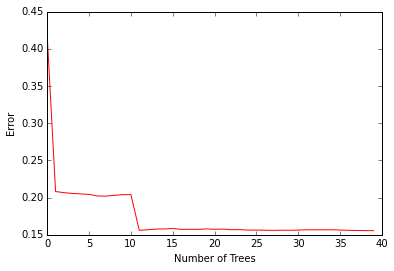

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt


from sklearn.metrics import log_loss


errors = []
growing_rf = RandomForestClassifier(n_estimators=10, n_jobs=-1,  
                                    warm_start=True, random_state=1000)
for i in range(40):
    growing_rf.fit(features_train, target_train)
    growing_rf.n_estimators += 10
    errors.append(log_loss(target, growing_rf.predict_proba(features_array)))

_ = plt.plot(errors, '-r')
plt.xlabel('Number of Trees')
plt.ylabel('Error')

Feature ranking:
1. feature 178 (0.026612)
2. feature 79 (0.014246)
3. feature 3 (0.013927)
4. feature 55 (0.013523)
5. feature 172 (0.012936)
6. feature 32 (0.012575)
7. feature 170 (0.011721)
8. feature 109 (0.011531)
9. feature 17 (0.011525)
10. feature 180 (0.011426)


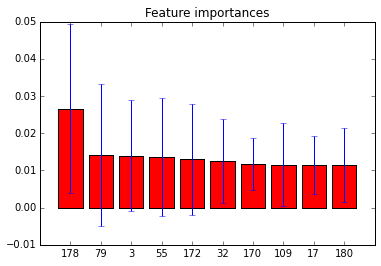

In [81]:
extra_forest.fit(features_train, target_train)
importances = extra_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in extra_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices][0:10],
       color="r", align="center", yerr=std[indices][0:10])
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [8]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import cross_val_score

rng = np.random.RandomState(0)

X_full, y_full = features_array, target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

# Estimate the score on the entire dataset, with no missing values
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_full, y_full).mean()
print("Score with the entire dataset = %.2f" % score)

# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = np.floor(n_samples * missing_rate)
missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                      dtype=np.bool),
                             np.ones(n_missing_samples,
                                     dtype=np.bool)))
rng.shuffle(missing_samples)
missing_features = rng.randint(0, n_features, n_missing_samples)

# Estimate the score without the lines containing missing values
X_filtered = X_full[~missing_samples, :]
y_filtered = y_full[~missing_samples]
estimator = RandomForestRegressor(random_state=0, n_estimators=100)
score = cross_val_score(estimator, X_filtered, y_filtered).mean()
print("Score without the samples containing missing values = %.2f" % score)

# Estimate the score after imputation of the missing values
X_missing = X_full.copy()
X_missing[np.where(missing_samples)[0], missing_features] = 0
y_missing = y_full.copy()
estimator = Pipeline([("imputer", Imputer(missing_values=0,
                                          strategy="mean",
                                          axis=0)),
                      ("forest", RandomForestRegressor(random_state=0,
                                                       n_estimators=100))])
score = cross_val_score(estimator, X_missing, y_missing).mean()
print("Score after imputation of the missing values = %.2f" % score)

Score with the entire dataset = -0.22
Score without the samples containing missing values = -0.57
Score after imputation of the missing values = -0.20


In [21]:
#http://stackoverflow.com/questions/24123498/recursive-feature-elimination-on-random-forest-using-scikit-learn?rq=1

from sklearn import datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV


def get_enhanced_confusion_matrix(actuals, predictions, labels):
    """"enhances confusion_matrix by adding sensivity and specificity metrics"""
    cm = confusion_matrix(actuals, predictions, labels = labels)
    sensitivity = float(cm[1][1]) / float(cm[1][0]+cm[1][1])
    specificity = float(cm[0][0]) / float(cm[0][0]+cm[0][1])
    weightedAccuracy = (sensitivity * 0.9) + (specificity * 0.1)
    return cm, sensitivity, specificity, weightedAccuracy


x= features_array
# print(x.shape)
y= target
# print(target.shape)


class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_

rf = RandomForestClassifierWithCoef(n_estimators=10, min_samples_leaf=5, n_jobs=-1)
rfecv = RFECV(estimator=rf, step=1, cv=2, scoring='roc_auc', verbose=2)
selector=rfecv.fit(x, y)

# # iris = datasets.load_iris()
# # x=pandas.DataFrame(iris.data, columns=['var1','var2','var3', 'var4'])
# # y=pandas.Series(iris.target, name='target')

response, _  = pd.factorize(y)

xTrain, xTest, yTrain, yTest = cross_validation.train_test_split(x, response, test_size = .25, random_state = 36583)
print("building the first forest")
rf = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, n_jobs = -1, verbose = 1)
rf.fit(xTrain, yTrain)
importances = pd.DataFrame({'name':x.columns,'imp':rf.feature_importances_
                                }).sort(['imp'], ascending = False).reset_index(drop = True)

cm, sensitivity, specificity, weightedAccuracy = get_enhanced_confusion_matrix(yTest, rf.predict(xTest), [0,1])
numFeatures = len(x.columns)

rfeMatrix = pandas.DataFrame({'numFeatures':[numFeatures], 
                              'weightedAccuracy':[weightedAccuracy], 
                              'sensitivity':[sensitivity], 
                              'specificity':[specificity]})

print("running RFE on  %d features"%numFeatures)

for i in range(1,numFeatures,1):
    varsUsed = importances['name'][0:i]
    print("now using %d of %s features"%(len(varsUsed), numFeatures))
    xTrain, xTest, yTrain, yTest = cross_validation.train_test_split(x[varsUsed], response, test_size = .25)
    rf = RandomForestClassifier(n_estimators = 500, min_samples_split = 2,
                                n_jobs = -1, verbose = 1)
    rf.fit(xTrain, yTrain)
    cm, sensitivity, specificity, weightedAccuracy = get_enhanced_confusion_matrix(yTest, rf.predict(xTest), [0,1])
    print("\n"+str(cm))
    print('the sensitivity is %d percent'%(sensitivity * 100))
    print('the specificity is %d percent'%(specificity * 100))
    print('the weighted accuracy is %d percent'%(weightedAccuracy * 100))
    rfeMatrix = rfeMatrix.append(
                                pd.DataFrame({'numFeatures':[len(varsUsed)], 
                                'weightedAccuracy':[weightedAccuracy], 
                                'sensitivity':[sensitivity], 
                                'specificity':[specificity]}), ignore_index = True)    
print("\n"+str(rfeMatrix))    
maxAccuracy = rfeMatrix.weightedAccuracy.max()
maxAccuracyFeatures = min(rfeMatrix.numFeatures[rfeMatrix.weightedAccuracy == maxAccuracy])
featuresUsed = importances['name'][0:maxAccuracyFeatures].tolist()

print("the final features used are %s"%featuresUsed)

Fitting estimator with 186 features.
Fitting estimator with 185 features.
Fitting estimator with 184 features.
Fitting estimator with 183 features.
Fitting estimator with 182 features.
Fitting estimator with 181 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
Fitting estimator with 166 features.
Fitting estimator with 165 features.
Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
F